<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/EDA(Task2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import missingno as msno

%matplotlib inline
sns.set_style("whitegrid")


In [5]:
df = pd.read_csv("netflix_titles.csv")
print(df.shape)
df.head()


(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
# Convert duration to numeric
df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')

# Mean, median, std
print("Duration Mean:", df['duration_int'].mean())
print("Duration Median:", df['duration_int'].median())
print("Duration Std Dev:", df['duration_int'].std())

print("Release Year Mean:", df['release_year'].mean())
print("Release Year Median:", df['release_year'].median())
print("Release Year Mode:", df['release_year'].mode()[0])


Duration Mean: 69.84688777828259
Duration Median: 88.0
Duration Std Dev: 50.81482778918891
Release Year Mean: 2014.1801975701146
Release Year Median: 2017.0
Release Year Mode: 2018


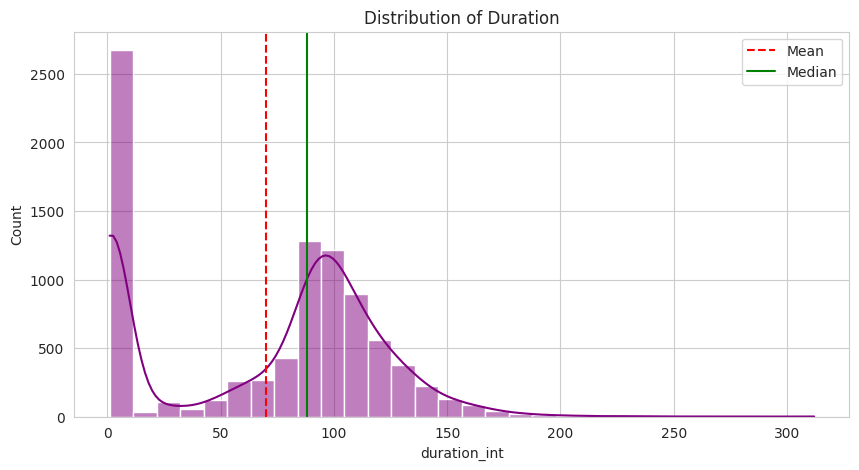

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['duration_int'].dropna(), bins=30, kde=True, color='purple')
plt.axvline(df['duration_int'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['duration_int'].median(), color='green', linestyle='-', label='Median')
plt.title("Distribution of Duration")
plt.legend()


Text(0.5, 1.0, 'Duration by Type')

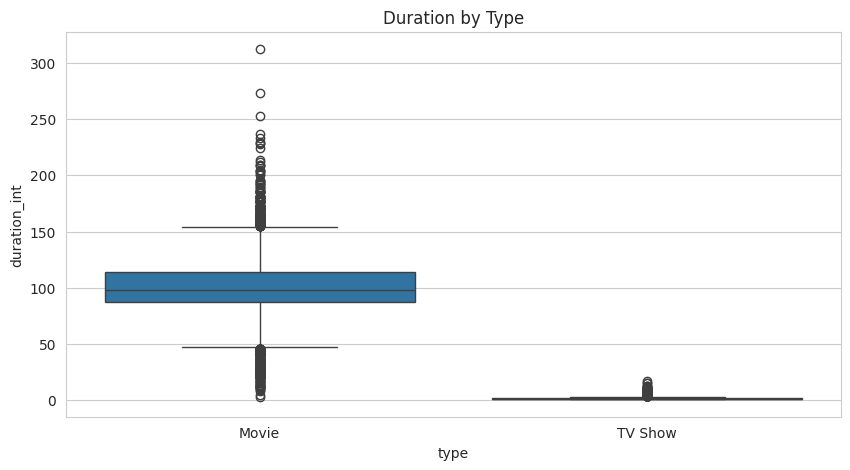

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='duration_int', data=df)
plt.title("Duration by Type")


Text(0.5, 1.0, 'Correlation Matrix')

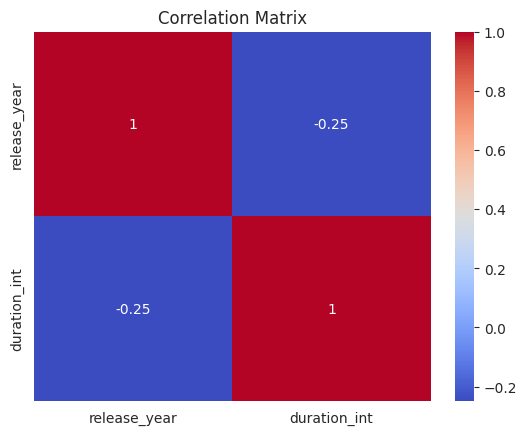

In [10]:
df_corr = df[['release_year', 'duration_int']].dropna()
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


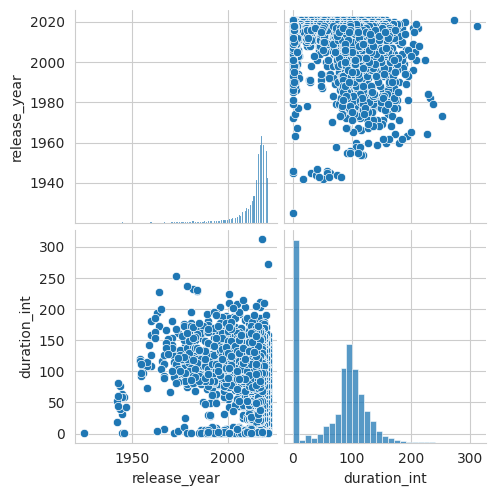

In [15]:
sns.pairplot(df_corr)


Text(0.5, 1.0, 'Content Added Over Years')

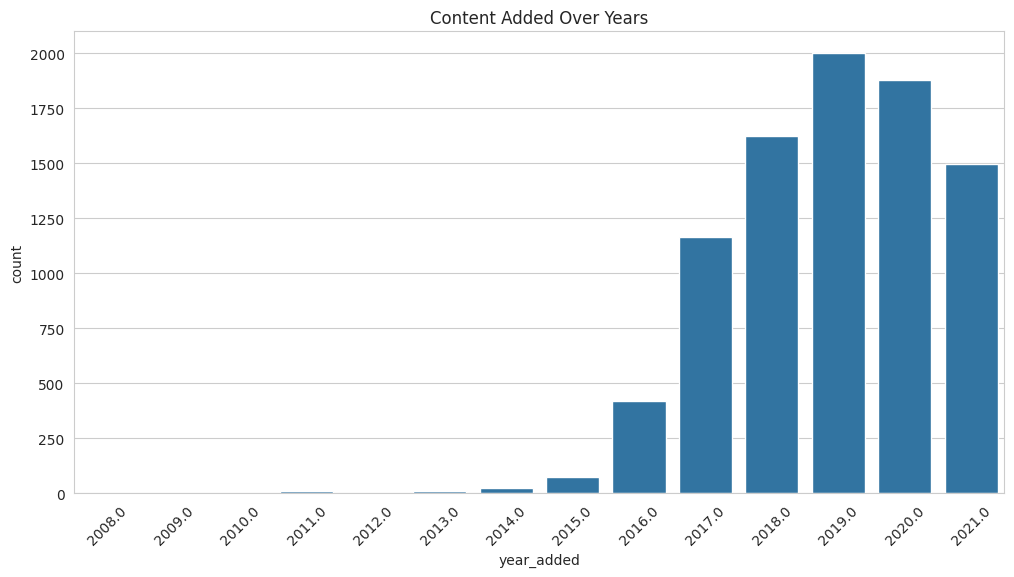

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Content Added Over Years")


/tmp/ipython-input-17-3869969215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


Text(0.5, 1.0, 'Top Countries with Most Titles')

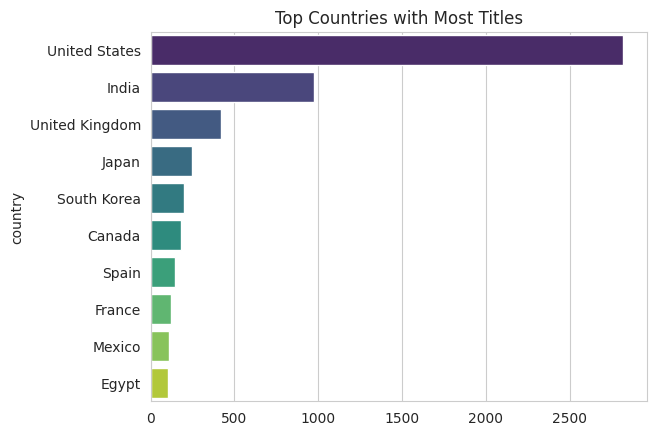

In [17]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title("Top Countries with Most Titles")


In [18]:
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(15).reset_index()
genres.columns = ['Genre', 'Count']
px.bar(genres, x='Genre', y='Count', title="Top 15 Genres on Netflix")


Text(0.5, 1.0, 'Content Rating by Type')

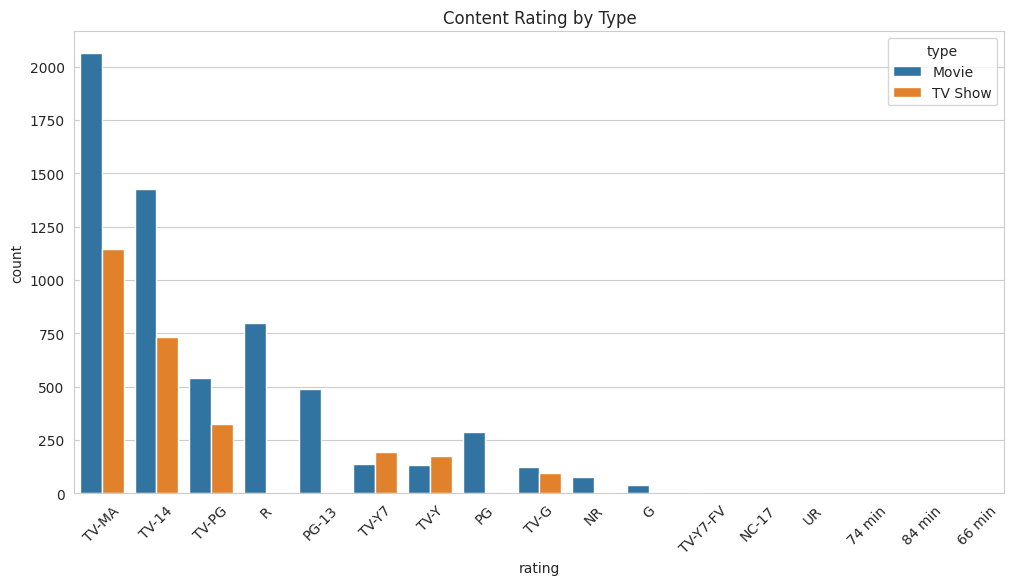

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Content Rating by Type")


Text(0.5, 1.0, 'Frequent Words in Descriptions')

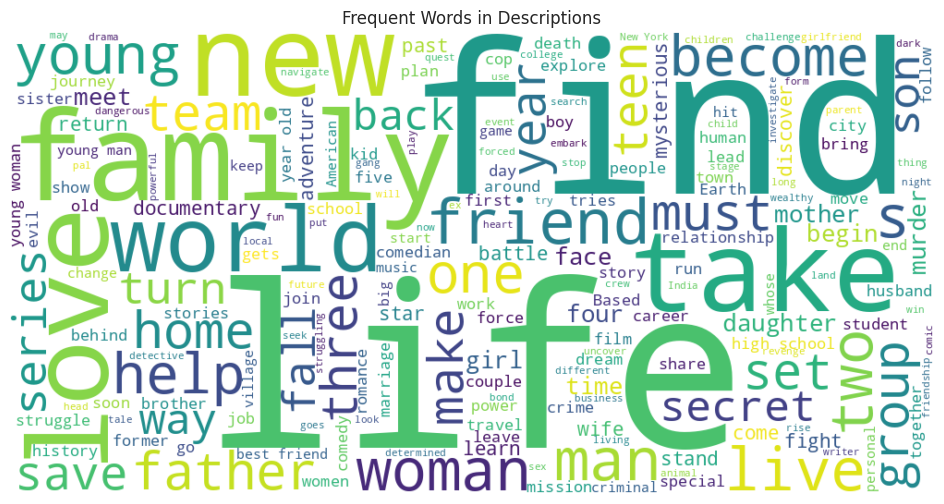

In [20]:
text = " ".join(df['description'].dropna())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=500).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Descriptions")
